# Fuadulent Transactions Detection by implementation of ML models (Logistics Regression, K Nearest Neighbours & Random Forest)

# Content

1. Import necessary Libraries.
2. Import the Data.
3. EDA & Cleaning on Data.
4. Plotting graphs to visualize the relation between the parameters and Fraudulent transactions.
5. Deleting Outliers
6. Testing multicollinearty
7. Applying ML models to predict the require values
8. Observations

# 1. Import necessary Libraries.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Import the Data.

In [2]:
df = pd.read_csv(r'C:\Users\Aditya Dixit\Desktop\Writing works\PYTHON PRACTICE\Aditya Dixit - Assignments\raw data\Fraud (1).csv')

# 3. EDA & Cleaning on Data.

- 3.1 df.head()
- 3.2 df.tail()
- 3.3 df.info()
- 3.4 df.describe()
- 3.5 df.sahpe()
- 3.6 dropping the column 'isFlaggedFraud'
- 3.7 checking is any data is of 'null' type
- 3.8 dropping the instances where merchants have been a part of the transaction
- 3.9 dropping the 'nameorig' & 'nameDest'
- 3.10 transforming the 'step' column into categorical column respresenting four '6-hour' time slots

In [3]:
# 3.1
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
# 3.2
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
# 3.3 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# 3.4
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
# 3.5
df.shape

(6362620, 11)

In [8]:
# 3.6
# Let us drop the column 'isFlaggedFraud' since the target variable is 'isFraud' and rest are given dependent variable

df = df.drop('isFlaggedFraud', axis=1)

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [9]:
# 3.7
# Check if any instance contains a null value in any feature.

if df.isna().any().any():
    print(df.index)
else:
    print("No null values in any row.")

No null values in any row.


In [10]:
# 3.8 
# dropping the instances where merchants have been a part of the transaction
# as there is no information about such instances.
# There is high chance that these instances behave a noise in our model, meaning they essentially have no meaningful information.

df = df[~df['nameDest'].str.startswith('M')]

print(df.shape)
df.info()

(4211125, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4211125 entries, 2 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 353.4+ MB


In [11]:
# 3.9
# drop the 'nameOrig' & 'nameDest'"raw data
# these features are just the identification of cutomers and do not inherently indicate whether the transaction are fraudulent or not

df = df.drop('nameOrig', axis=1)
df = df.drop('nameDest', axis=1)

print(df.shape)
df.head()

(4211125, 8)


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.00,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.00,1
9,1,DEBIT,5337.77,41720.0,36382.23,41898.0,40348.79,0
10,1,DEBIT,9644.94,4465.0,0.00,10845.0,157982.12,0
15,1,CASH_OUT,229133.94,15325.0,0.00,5083.0,51513.44,0


In [12]:
# 3.10
# transforming the 'step' column into categorical column respresenting four '6-hour' time slots
# assuming that the simulation starts on the midnight on the first day of a month having approx. 30 days
# so that the for the first day- (1-6), (7-12), (13-18), (19-24) into time slots as '1', '2', '3', '4'.
# same will be replicated with other days.

def map_to_time_slot(step):
    
    time_slot = ((step - 1) % 24) // 6 + 1
    return int(time_slot)


df['time_slot'] = df['step'].apply(map_to_time_slot)

# Unique values in time_slot for each day of the simulation
print(set(list(df['time_slot'].values)))

# placing time_slot in place of step
df.drop(columns=['step'], inplace=True)

df = df[['time_slot', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']]

(df.head())


{1, 2, 3, 4}


,time_slot,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.00,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.00,1
9,1,DEBIT,5337.77,41720.0,36382.23,41898.0,40348.79,0
10,1,DEBIT,9644.94,4465.0,0.00,10845.0,157982.12,0
15,1,CASH_OUT,229133.94,15325.0,0.00,5083.0,51513.44,0


# 4. Plotting graphs to visualize the relation between the parameters and Fraudulent transactions.

- 4.1 distribution of transaction as per the time-slots
- 4.2 distribution of transaction as per being fraudulent or valid
- 4.3 distribution of fraudulent transactions as per the time_slots
- 4.4 distribution of valid transactions as per the time_slots
- 4.5 distribution of type of transactions as per the time_slots
- 4.6 distribution of type of transactions vs fruadulent transaction
- 4.7 distribution of type of transactions vs valid transaction
- 4.8 top 10 & lowest 10 value of amount of transactions
- 4.9 total value of amount being under transaction
- 4.10 distribution of amount being transaction as per the time_slots
- 4.11 top 10 value of amount that are fraudulent
- 4.12 top 10 value of amount that are valid 

time_slot
1     0.505138
2    26.747746
3    45.478892
4    27.268224
Name: isFraud, dtype: float64


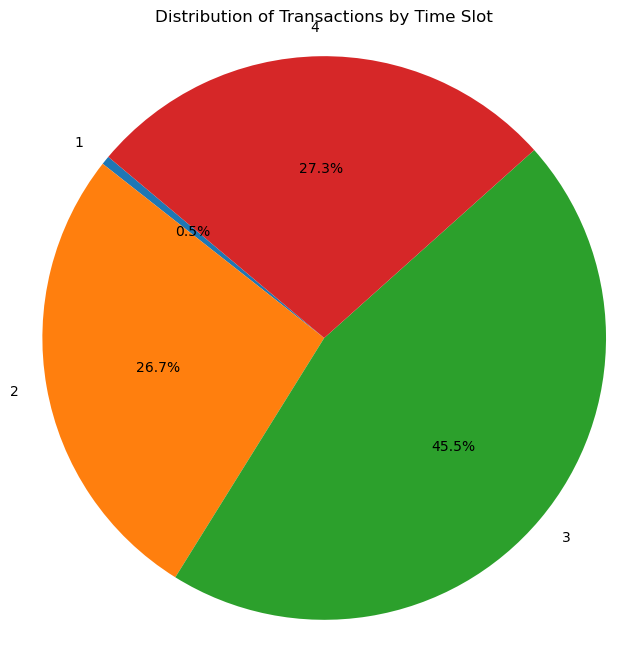

In [13]:
# 4.1 distribution of transaction as per the time-slots

time_slot_vs_transaction = (df.groupby('time_slot')['isFraud'].count() * 100)/ df.shape[0]
print(time_slot_vs_transaction)

plt.figure(figsize=(8, 8))
plt.pie(time_slot_vs_transaction, labels=time_slot_vs_transaction.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transactions by Time Slot')
plt.axis('equal')  
plt.show()



isFraud
0    99.804969
1     0.195031
Name: isFraud, dtype: float64


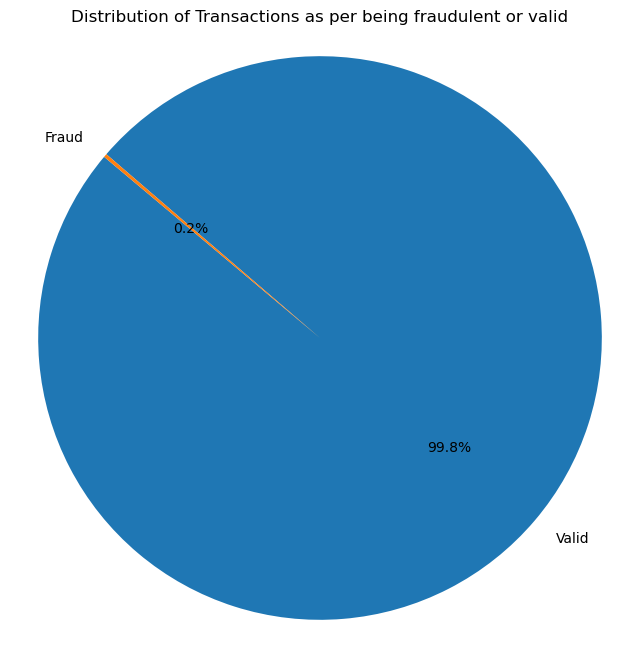

In [14]:
# 4.2 distribution of transaction as per being fraudulent or valid

fraudulent_vs_valid = (df.groupby('isFraud')['isFraud'].count() *100) / df.shape[0]
print(fraudulent_vs_valid)

plt.figure(figsize=(8, 8))
plt.pie(fraudulent_vs_valid, labels=('Valid','Fraud'), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transactions as per being fraudulent or valid')
plt.axis('equal')  
plt.show()

time_slot
1    25.009132
2    25.264824
3    25.337879
4    24.388165
Name: isFraud, dtype: float64


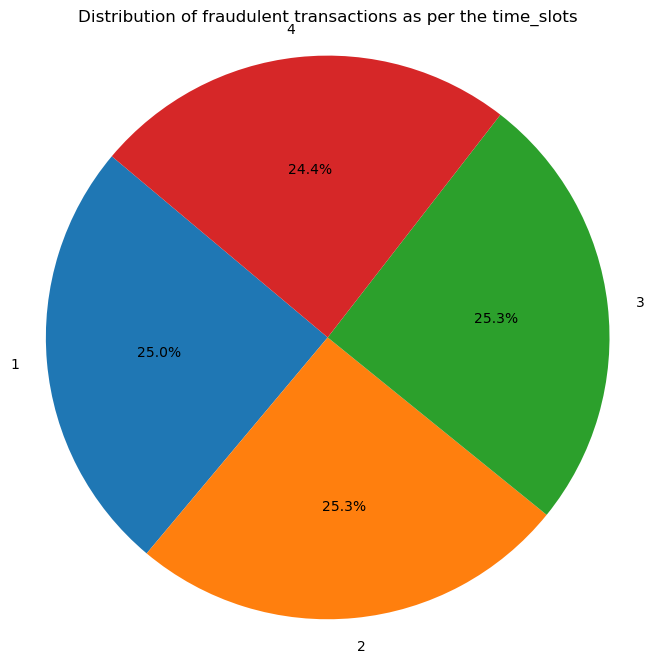

In [15]:
# 4.3 distribution of fraudulent transactions as per the time_slots

fraudulent_df = df[df['isFraud'] == 1]

time_slot_vs_fradulent = (fraudulent_df.groupby('time_slot')['isFraud'].count() *100) / fraudulent_df.shape[0]
print(time_slot_vs_fradulent)

plt.figure(figsize=(8, 8))
plt.pie(time_slot_vs_fradulent, labels=time_slot_vs_fradulent.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of fraudulent transactions as per the time_slots')
plt.axis('equal')  
plt.show()

time_slot
1     0.457254
2    26.750643
3    45.518250
4    27.273852
Name: isFraud, dtype: float64


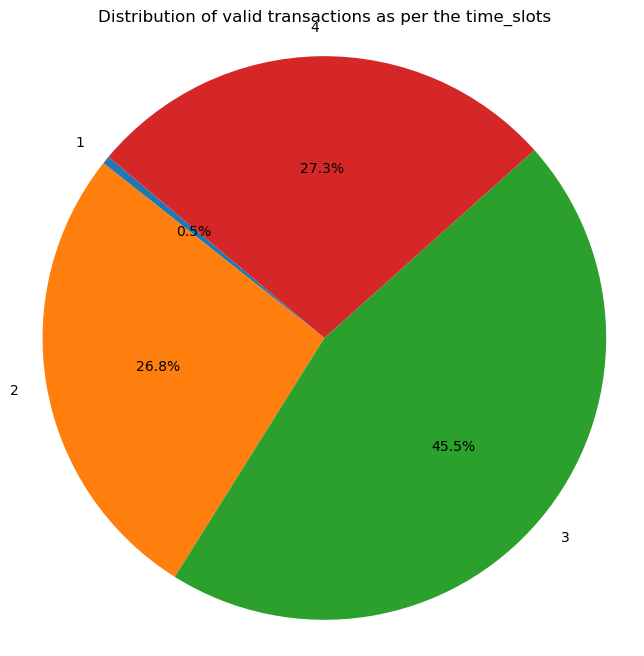

In [16]:
# 4.4 distribution of valid transactions as per the time_slots

valid_df = df[df['isFraud'] == 0]

time_slot_vs_valid = (valid_df.groupby('time_slot')['isFraud'].count() *100) / valid_df.shape[0]
print(time_slot_vs_valid)

plt.figure(figsize=(8, 8))
plt.pie(time_slot_vs_valid, labels=time_slot_vs_valid.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of valid transactions as per the time_slots')
plt.axis('equal')  
plt.show()

type       CASH_IN  CASH_OUT  DEBIT  TRANSFER
time_slot                                    
1             8768      6753   1749      4002
2           380003    593195   9681    143502
3           623827   1038769  15549    237028
4           386686    598783  14453    148377


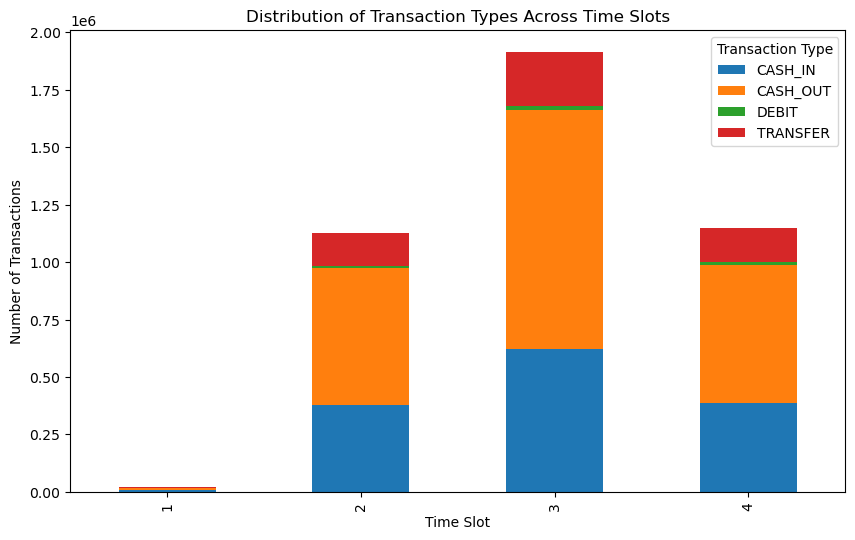

In [17]:
# 4.5 distribution of type of transactions as per the time_slots

transaction_counts = df.groupby(['time_slot', 'type']).size().unstack(fill_value=0)

transaction_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

print(transaction_counts)

plt.xlabel('Time Slot')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transaction Types Across Time Slots')
plt.legend(title='Transaction Type')
plt.show()


type
CASH_OUT    4116
TRANSFER    4097
dtype: int64


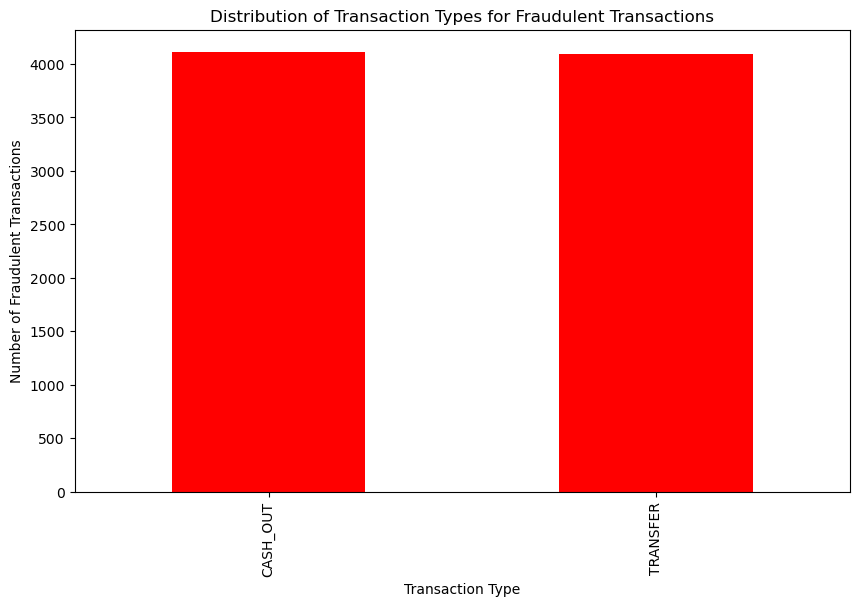

In [18]:
# 4.6 distribution of type of transactions vs fruadulent transaction

fraudulent_transactions = df[df['isFraud'] == 1]

fraudulent_transaction_counts = fraudulent_transactions.groupby('type').size()
print(fraudulent_transaction_counts)

fraudulent_transaction_counts.plot(kind='bar', figsize=(10, 6), color='red')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Transaction Types for Fraudulent Transactions')
plt.show()


type
CASH_IN     1399284
CASH_OUT    2233384
DEBIT         41432
TRANSFER     528812
dtype: int64


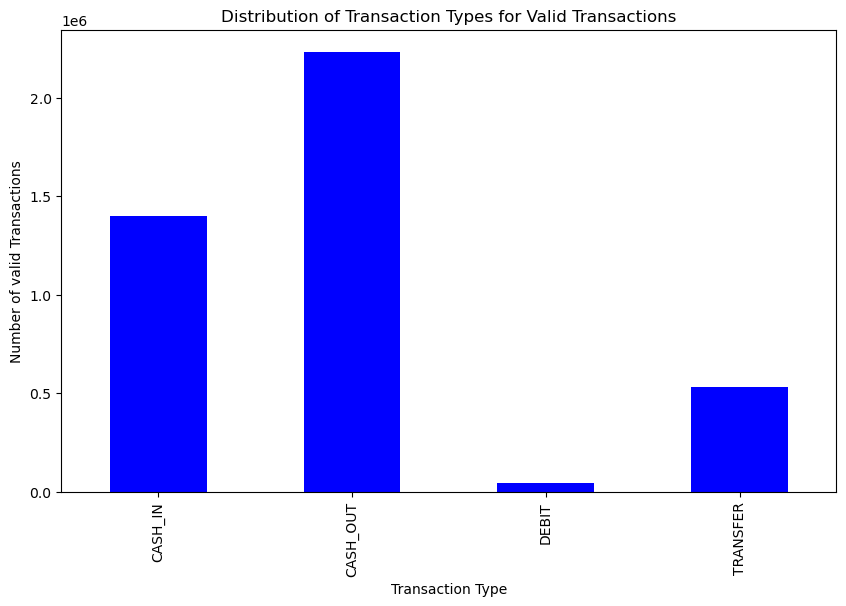

In [19]:
# 4.7 distribution of type of transactions vs valid transaction

valid_transactions = df[df['isFraud'] == 0]

valid_transaction_counts = valid_transactions.groupby('type').size()
print(valid_transaction_counts)

valid_transaction_counts.plot(kind='bar', figsize=(10, 6), color='blue')
plt.xlabel('Transaction Type')
plt.ylabel('Number of valid Transactions')
plt.title('Distribution of Transaction Types for Valid Transactions')
plt.show()

In [20]:
# 4.8 top 10 & lowest 10 value of amount of transactions

top_10_amount = df.nlargest(10, 'amount')
lowest_10_amount = df.nsmallest(10, 'amount')

print('Top 10 values of amount being transacted:')
print(top_10_amount['amount'].head(10))

print('Lowest 10 values of amount being transacted (excluding 0 amounts):')
print(lowest_10_amount['amount'].head(10))

Top 10 values of amount being transacted:
3686583    92445516.64
4060598    73823490.36
4146397    71172480.42
3946920    69886731.30
3911956    69337316.27
3937152    67500761.29
4105338    66761272.21
3892529    64234448.19
3991638    63847992.58
4143801    63294839.63
Name: amount, dtype: float64
Lowest 10 values of amount being transacted (excluding 0 amounts):
2736447    0.0
3247298    0.0
3760289    0.0
5563714    0.0
5996408    0.0
5996410    0.0
6168500    0.0
6205440    0.0
6266414    0.0
6281483    0.0
Name: amount, dtype: float64


In [21]:
# 4.9 total value of amount being under transaction

total_amount_transacted = df['amount'].sum()
print("Total value of amount being transacted:", total_amount_transacted)


Total value of amount being transacted: 1116299573621.4006


time_slot
1    7.259507e+09
2    3.277824e+11
3    5.297664e+11
4    2.514913e+11
Name: amount, dtype: float64


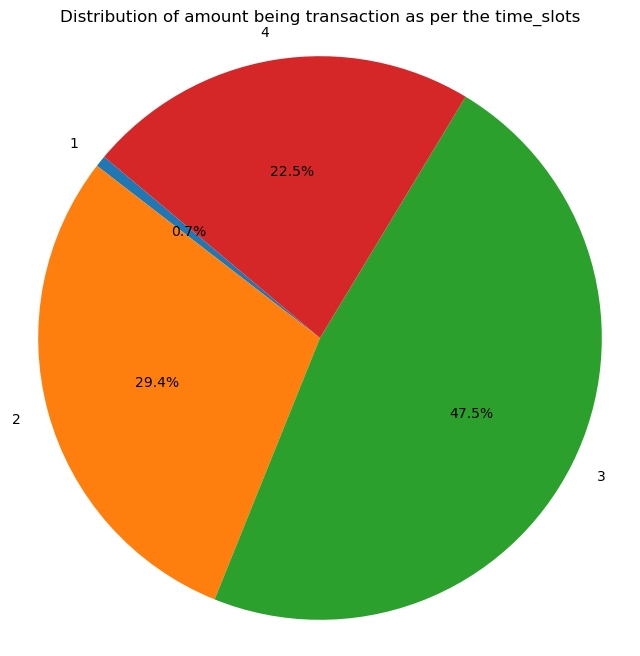

In [22]:
# 4.10 distribution of amount being transaction as per the time_slots

amount_vs_time_slot = df.groupby('time_slot')['amount'].sum()
amount_vs_time_slot_percent = (df.groupby('time_slot')['amount'].sum() * 100) / total_amount_transacted
print(amount_vs_time_slot)

plt.figure(figsize=(8, 8))
plt.pie(amount_vs_time_slot_percent, labels=amount_vs_time_slot_percent.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of amount being transaction as per the time_slots')
plt.axis('equal')  
plt.show()


In [23]:
# 4.11 top 10 value of amount that are fraudulent

fraud_amount = df[df['isFraud'] == 1]

fraud_amount.sort_values('amount', ascending=False).head(10)

,time_slot,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
3760283,3,CASH_OUT,10000000.0,10000000.00,0.00,0.00,10000000.00,1
5987587,1,CASH_OUT,10000000.0,10000000.00,0.00,8496.86,10008496.86,1
1707592,3,CASH_OUT,10000000.0,10000000.00,0.00,2145275.47,12145275.47,1
1707591,3,TRANSFER,10000000.0,27670038.08,17670038.08,0.00,0.00,1
1707590,3,CASH_OUT,10000000.0,10000000.00,0.00,158643.25,10158643.25,1
1707589,3,TRANSFER,10000000.0,37670038.08,27670038.08,0.00,0.00,1
6055664,3,CASH_OUT,10000000.0,10000000.00,0.00,714460.87,10714460.87,1
6351219,1,TRANSFER,10000000.0,33171085.59,23171085.59,0.00,0.00,1
6351220,1,CASH_OUT,10000000.0,10000000.00,0.00,3485891.28,13485891.28,1
6351221,1,TRANSFER,10000000.0,23171085.59,13171085.59,0.00,0.00,1


In [24]:
# 4.12 top 10 value of amount that are valid 

valid_amount = df[df['isFraud'] == 0]

valid_amount.sort_values('amount', ascending=False).head(10)

,time_slot,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
3686583,2,TRANSFER,92445516.64,0.0,0.0,9.595980e+03,9.245511e+07,0
4060598,2,TRANSFER,73823490.36,0.0,0.0,9.362401e+07,1.674475e+08,0
4146397,3,TRANSFER,71172480.42,0.0,0.0,1.134615e+08,1.846340e+08,0
3946920,4,TRANSFER,69886731.30,0.0,0.0,1.515387e+08,2.214254e+08,0
3911956,4,TRANSFER,69337316.27,0.0,0.0,1.130072e+08,1.823446e+08,0
3937152,4,TRANSFER,67500761.29,0.0,0.0,8.635615e+07,1.538569e+08,0
4105338,3,TRANSFER,66761272.21,0.0,0.0,6.874206e+07,1.355033e+08,0
3892529,4,TRANSFER,64234448.19,0.0,0.0,6.597691e+07,1.663021e+08,0
3991638,2,TRANSFER,63847992.58,0.0,0.0,7.217149e+07,1.360195e+08,0
4143801,3,TRANSFER,63294839.63,0.0,0.0,7.512528e+07,1.384201e+08,0


# 5. Deleting Outliers

In [25]:
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
z_scores = stats.zscore(df[numerical_cols])

# outliers based on Z-score (threshold of 3)
outliers = (z_scores > 3) | (z_scores < -3)

print("Rows with outliers:")
df[outliers.any(axis=1)].shape


Rows with outliers:


(181823, 8)

In [26]:
df = df[~outliers.any(axis=1)]

In [27]:
df.shape

(4029302, 8)

# 6. Testing the multicollinearty

- 6.1 By Co-relation

In [28]:
correlation_matrix = df.corr()
correlation_matrix.head()

C:\Users\Aditya Dixit\AppData\Local\Temp\ipykernel_14140\145922235.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,time_slot,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
time_slot,1.000000,-0.074493,-0.000038,-0.000611,0.004992,-0.005905,-0.027773
amount,-0.074493,1.000000,-0.084090,-0.083562,0.127605,0.239129,0.049354
oldbalanceOrg,-0.000038,-0.084090,1.000000,0.998247,0.052663,0.003093,-0.004982
newbalanceOrig,-0.000611,-0.083562,0.998247,1.000000,0.053542,0.000143,-0.016150
oldbalanceDest,0.004992,0.127605,0.052663,0.053542,1.000000,0.985366,-0.017926


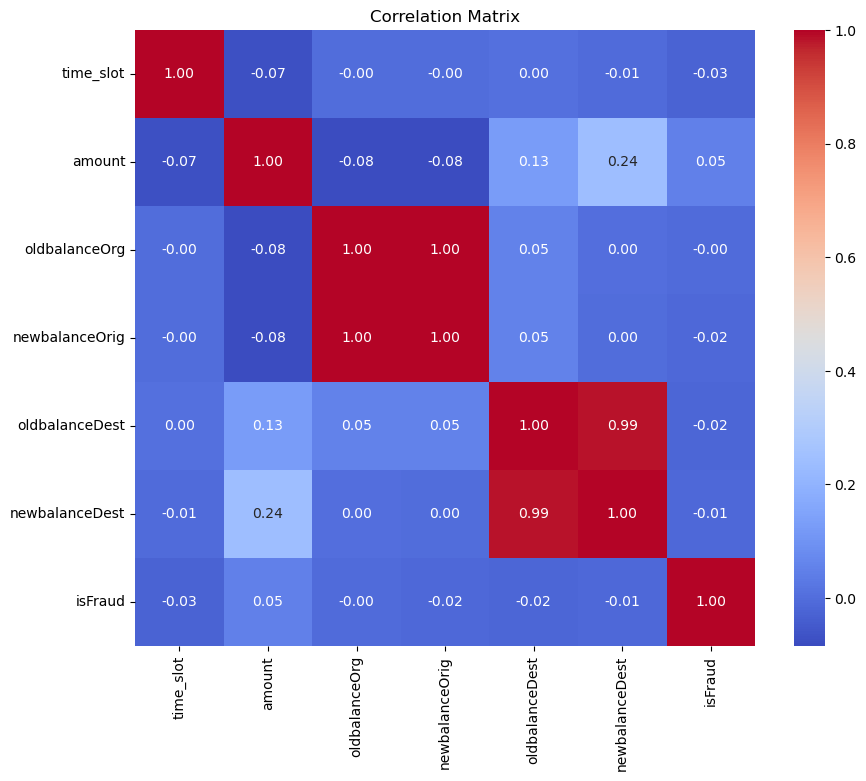

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

- Observations from Correlation- 

- 'oldbalanceOrg' & 'newbalanceOrg' have a high correlation
- 'oldbalanceDest' & 'newbalanceDest' have a high correlation

- To deal with Correlation, we will delete the columns 'oldbalanceOrg' & 'newbalanceDest'

In [30]:
drop = ['oldbalanceOrg', 'newbalanceDest']
df = df.drop(columns=drop)
print(df.shape)
df.head()

(4029302, 6)


,time_slot,type,amount,newbalanceOrig,oldbalanceDest,isFraud
2,1,TRANSFER,181.00,0.00,0.0,1
3,1,CASH_OUT,181.00,0.00,21182.0,1
9,1,DEBIT,5337.77,36382.23,41898.0,0
10,1,DEBIT,9644.94,0.00,10845.0,0
15,1,CASH_OUT,229133.94,0.00,5083.0,0


# 7. Applying ML models to predict the require values

- 7.1 Splitting the dataset into independent variable & dependent variable
- 7.2 Encoding the categorical features
- 7.3 Splitting the dataset into Train-Test 
- 7.4 Feature Scaling
- 7.5 Applying Logistics Regression
- 7.6 Applying K Nearest Neighbours
- 7.7 Applying Random Forest
- 7.8 Comparing all of models

In [46]:

df = df[['type', 'time_slot', 'amount', 'newbalanceOrig', 'oldbalanceDest', 'isFraud']]


df.head()

,type,time_slot,amount,newbalanceOrig,oldbalanceDest,isFraud
2,TRANSFER,1,181.00,0.00,0.0,1
3,CASH_OUT,1,181.00,0.00,21182.0,1
9,DEBIT,1,5337.77,36382.23,41898.0,0
10,DEBIT,1,9644.94,0.00,10845.0,0
15,CASH_OUT,1,229133.94,0.00,5083.0,0


In [87]:
# 7.1
# Splitting the dataset into independent variable & dependent variable

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [88]:
X

array([['TRANSFER', 1, 181.0, 0.0, 0.0],
       ['CASH_OUT', 1, 181.0, 0.0, 21182.0],
       ['DEBIT', 1, 5337.77, 36382.23, 41898.0],
       ...,
       ['CASH_OUT', 4, 339682.13, 0.0, 0.0],
       ['TRANSFER', 4, 850002.52, 0.0, 0.0],
       ['CASH_OUT', 4, 850002.52, 0.0, 6510099.11]], dtype=object)

In [89]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [91]:
# 7.2 Encoding the categorical features

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

X = np.array(ct.fit_transform(X))

In [92]:
X

array([[0.0, 0.0, 0.0, ..., 181.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, ..., 181.0, 0.0, 21182.0],
       [0.0, 0.0, 1.0, ..., 5337.77, 36382.23, 41898.0],
       ...,
       [0.0, 1.0, 0.0, ..., 339682.13, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 850002.52, 0.0, 0.0],
       [0.0, 1.0, 0.0, ..., 850002.52, 0.0, 6510099.11]], dtype=object)

In [93]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [99]:
# 7.3 Splitting the dataset into Train-Test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [100]:
X_train

array([[0.0, 1.0, 0.0, ..., 361770.9, 0.0, 577607.51],
       [1.0, 0.0, 0.0, ..., 136334.24, 166494.24, 0.0],
       [0.0, 1.0, 0.0, ..., 209663.06, 0.0, 915287.67],
       ...,
       [0.0, 1.0, 0.0, ..., 65471.9, 41386.1, 0.0],
       [1.0, 0.0, 0.0, ..., 411108.05, 2090262.75, 807575.39],
       [0.0, 0.0, 0.0, ..., 211458.16, 0.0, 3521226.02]], dtype=object)

In [101]:
X_test

array([[0.0, 1.0, 0.0, ..., 168806.53, 0.0, 188592.53],
       [0.0, 1.0, 0.0, ..., 99001.01, 0.0, 1466826.55],
       [0.0, 1.0, 0.0, ..., 63608.99, 0.0, 1123336.83],
       ...,
       [1.0, 0.0, 0.0, ..., 128664.4, 3514485.08, 1226064.97],
       [1.0, 0.0, 0.0, ..., 93293.47, 2483688.7, 1682090.55],
       [0.0, 0.0, 0.0, ..., 1167474.18, 0.0, 2005953.48]], dtype=object)

In [102]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
# 7.4 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [107]:
X_train

array([[0.0, 1.0, 0.0, ..., 0.5313095699940817, -0.3943318710903899,
        -0.36836955366066587],
       [1.0, 0.0, 0.0, ..., -0.33229986205568224, -0.3140412467802207,
        -0.6428607101534489],
       [0.0, 1.0, 0.0, ..., -0.05138964721715786, -0.3943318710903899,
        -0.207896886601562],
       ...,
       [0.0, 1.0, 0.0, ..., -0.6037614122805536, -0.37437372835366167,
        -0.6428607101534489],
       [1.0, 0.0, 0.0, ..., 0.7203117850306866, 0.6136819867451191,
        -0.2590840124505221],
       [0.0, 0.0, 0.0, ..., -0.04451292498629915, -0.3943318710903899,
        1.0304994622277575]], dtype=object)

In [108]:
X_test

array([[0.0, 1.0, 0.0, ..., -0.20790405205630041, -0.3943318710903899,
        -0.5532375997032405],
       [0.0, 1.0, 0.0, ..., -0.4753171049339399, -0.3943318710903899,
        0.0542059122729441],
       [0.0, 1.0, 0.0, ..., -0.6108979030671889, -0.3943318710903899,
        -0.10902757907515526],
       ...,
       [1.0, 0.0, 0.0, ..., -0.36168171222287576, 1.3005027442210766,
        -0.06020902068599495],
       [1.0, 0.0, 0.0, ..., -0.49718171815967394, 0.8034087613489819,
        0.15650386250434334],
       [0.0, 0.0, 0.0, ..., 3.6178215509710525, -0.3943318710903899,
        0.31041029318915425]], dtype=object)

In [109]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [130]:
# 7.5 Applying Logistics Regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [131]:
y_pred_lr = classifier.predict(X_test)
print(np.concatenate((y_pred_lr.reshape(len(y_pred_lr),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [132]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", (accuracy_lr*100))

Accuracy: 99.83838399882461


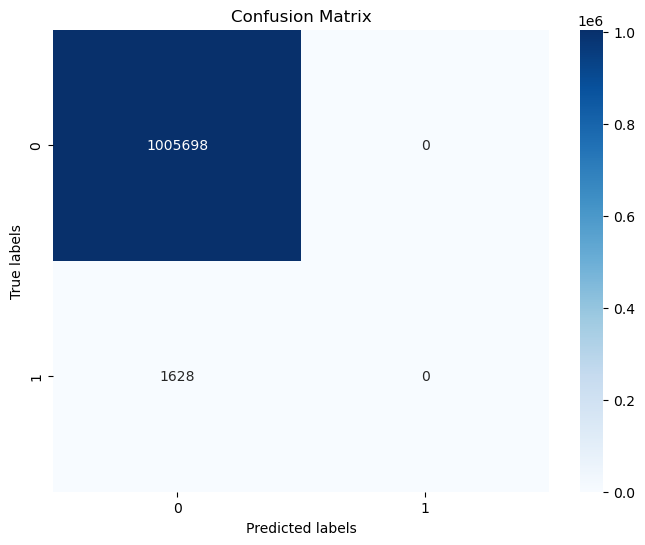

In [133]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [134]:
# 7.6 Applying K Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [138]:
y_pred_knn = classifier.predict(X_test)
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [139]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", (accuracy_knn*100))

Accuracy: 99.86508836265519


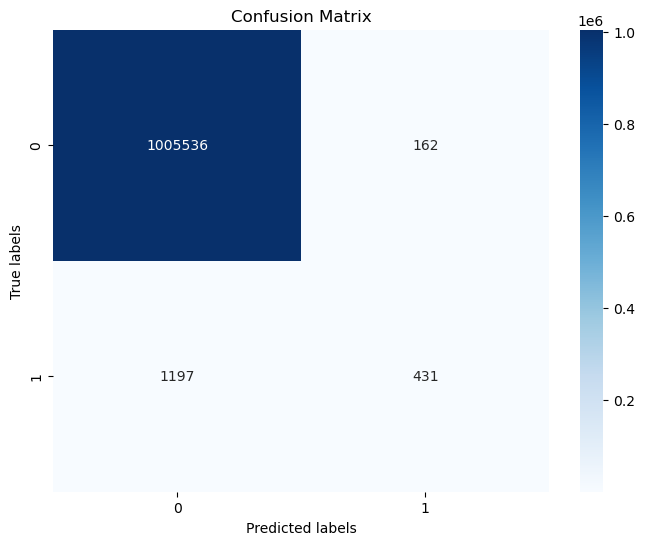

In [140]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [141]:
# 7.7 Applying Random Forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [142]:
y_pred_rf = classifier.predict(X_test)
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [143]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", (accuracy_rf*100))

Accuracy: 99.81545199865784


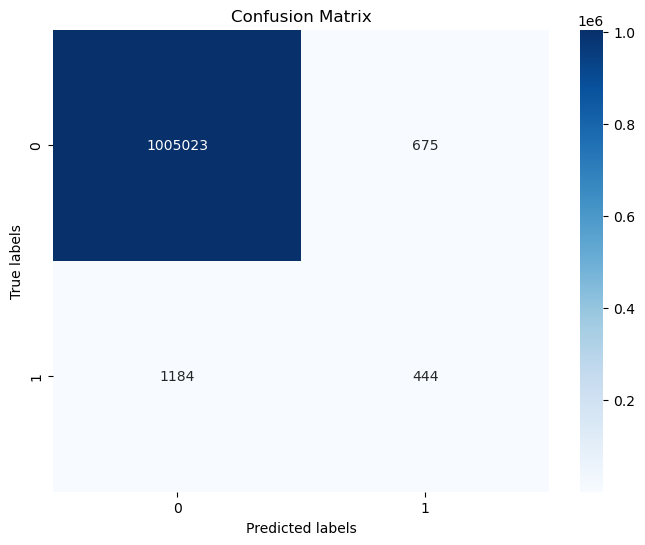

In [144]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [145]:
# 7.8 Comparing all of models

# Logistic Regression
print("Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)

# KNN
print("\nK Nearest Neighbors:")
print("Accuracy:", accuracy_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

# Random Forest
print("\nRandom Forest:")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)


Logistic Regression:
Accuracy: 0.9983838399882461
Confusion Matrix:
[[1005698       0]
 [   1628       0]]

K Nearest Neighbors:
Accuracy: 0.9986508836265519
Confusion Matrix:
[[1005536     162]
 [   1197     431]]

Random Forest:
Accuracy: 0.9981545199865783
Confusion Matrix:
[[1005023     675]
 [   1184     444]]


In [148]:
accuracy_dict = {
    'Logistic Regression Accuracy': accuracy_lr*100,
    'K Nearest Neighbour Accuracy': accuracy_knn*100,
    'Random Forest Accuracy': accuracy_rf*100
}

accuracy_table = pd.DataFrame.from_dict(accuracy_dict, orient='index', columns=['Accuracy'])
accuracy_table.index.name = 'Model'

print(accuracy_table)


                               Accuracy
Model                                  
Logistic Regression Accuracy  99.838384
K Nearest Neighbour Accuracy  99.865088
Random Forest Accuracy        99.815452


# 8. Observations

ML Modelling Observations:

- The accuracy scores for all three models are quite high, indicating that the models perform well in terms of overall classification accuracy.
- The confusion matrix provides a more detailed view of the model performance:
  - **Logistic Regression**: It correctly classifies a large number of instances with label 0, but it fails to predict any instances with label 1. This suggests that the model might be biased towards the majority class.
  - **K Nearest Neighbors**: It has a similar number of false negatives (instances wrongly classified as 0) as Logistic Regression, but it correctly classifies more instances with label 1.
  - **Random Forest**: It performs better than Logistic Regression in terms of capturing instances with label 1, but it misclassifies more instances with label 0 compared to Logistic Regression.
- In summary, while all three models have high accuracy, K Nearest Neighbors seems to strike a better balance in correctly classifying instances of both classes. Random Forest, although having a slightly lower accuracy than the other two models, shows better performance in capturing instances of the minority class. Further analysis and fine-tuning may be necessary to address the biases observed in Logistic Regression and to optimize the performance of all three models.